In [ ]:
!pip install yfinance prophet
# Get time series data
import yfinance as yf
# Prophet model for time series forecast
from prophet import Prophet
# Data processing
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 586 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
start_date = '2017-06-01'
end_date = '2017-08-15'
train_end_date = '2017-08-01'

In [ ]:
df = pd.read_csv("transactions.csv")
df['date'] = pd.to_datetime(df['date'])
# df = df[df['store_nbr'] == 1]
df.columns = ['ds', 'z','y']
df.head()

,ds,z,y
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


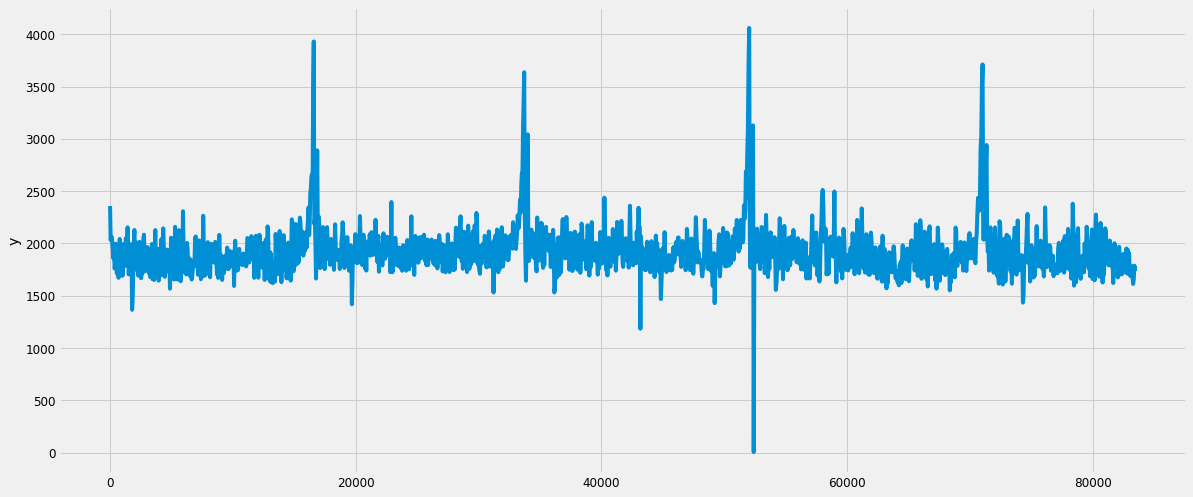

In [ ]:

sns.lineplot(x=df.index, y=df['y'])



a distribution of transactions over the years on store number 2 

In [ ]:
df = df.reset_index()
# Train test split
train = df[df['ds'] <= train_end_date]
test = df[df['ds'] > train_end_date]
# Check the shape of the dataset
print(train.shape)
print(test.shape)

(1662, 4)
(14, 4)


In [ ]:
# Use the default hyperparameters to initiate the Prophet model
model_baseline = Prophet()
# Fit the model on the training dataset
model_baseline.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd7yv_oxe/1c6q9695.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd7yv_oxe/8vr1_9tz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32296', 'data', 'file=/tmp/tmpd7yv_oxe/1c6q9695.json', 'init=/tmp/tmpd7yv_oxe/8vr1_9tz.json', 'output', 'file=/tmp/tmp22ia6a3c/prophet_model-20220806162427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


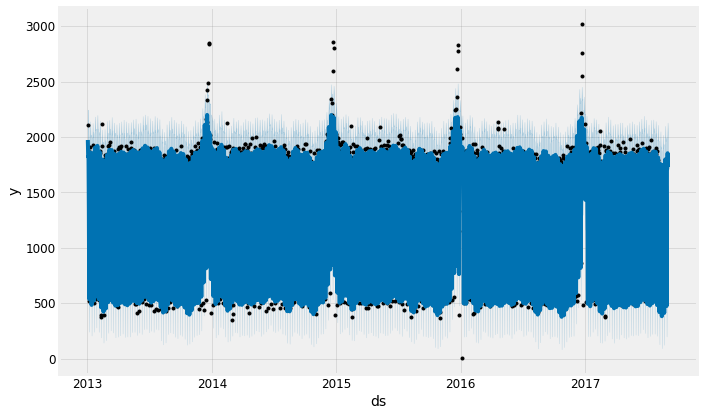

In [ ]:
# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=30)
# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)
# Visualize the forecast
model_baseline.plot(forecast_baseline); # Add semi-colon to remove the duplicated chart

In [ ]:
train_end_date = '2017-08-01'


for i in df['z'].unique():

  d = df[df['z'] == i]
  d = d.reset_index()
  # Train test split
  train = d[d['ds'] <= train_end_date]
  test = d[d['ds'] > train_end_date]
  
  # Use the default hyperparameters to initiate the Prophet model
  model_baseline = Prophet()
  # Fit the model on the training dataset
  model_baseline.fit(train)

  # Create the time range for the forecast
  future_baseline = model_baseline.make_future_dataframe(periods=30)
  # Make prediction
  forecast_baseline = model_baseline.predict(future_baseline)
  forecast_baseline = forecast_baseline[forecast_baseline['ds'] >= '2017-08-16']

  
  for k in forecast_baseline['ds']:

    # print(type(forecast_baseline[forecast_baseline['ds'] == k]['yhat']))
    # print(forecast_baseline[forecast_baseline['ds'] == k]['yhat'].iloc[0])
    
    dict1 = {}
    
    dict1['ds'] = k
    dict1['z'] = i
    dict1['y'] = forecast_baseline[forecast_baseline['ds'] == k]['yhat'].iloc[0]

    df = df.append(dict1, ignore_index=True)

  
  
df



In [ ]:
df.to_csv('TransactionsWithTest.csv')